#Introduction

Name | Abid Ilmun Fisabil

Batch | FTDS-006

Phase | 1

##Data Description
This dataset contains 6 columns and 223 Rows. Each row corresponds to a country in order of their life expectancy rank. The dataset has three numeric columns, Overall Life Expectancy, Male Life Expectancy and Female Life Expectancy.
The last column is Continent, which defines which continent that country lies in. This could be very well used as a class for the data.

This data can be used for classification by various techniques like SVM(linear), KNN, C.45 etc. and other supervised and unsupervised techniques. 

**source**

https://www.kaggle.com/amansaxena/lifeexpectancy

# Importing Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Data Loading

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/abidilmun/dataset/main/Life_expectancy_dataset.csv',encoding = 'ISO-8859-1')
df.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


# Attribute Inspection

In [8]:
df.shape

(223, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


In [11]:
df.isnull().sum()

Rank            0
Country         0
Overall Life    0
Male Life       0
Female Life     0
Continent       0
dtype: int64

In [13]:
df.duplicated().sum()

0

we have 223 observations with 6 features

data is quite clean already as no missing values and duplicates found

as for the categorical features, we are not going to encode them. this is because we are not going to use rank and country for clustering analysis, obviously because its unique to each observation.

the same goes to continent because continents situation probably linear with countries situation.

so we will luse overall life, female life, and male life for clustering analysis

# EDA

In [16]:
nums = df.dtypes[df.dtypes != object].index

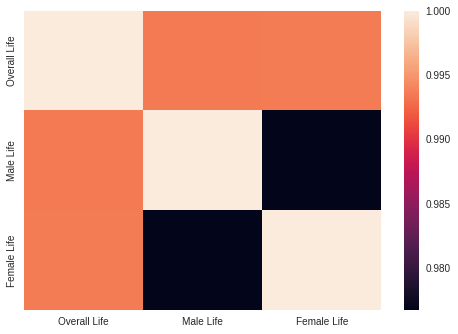

In [17]:
sns.heatmap(df[nums[1:]].corr())

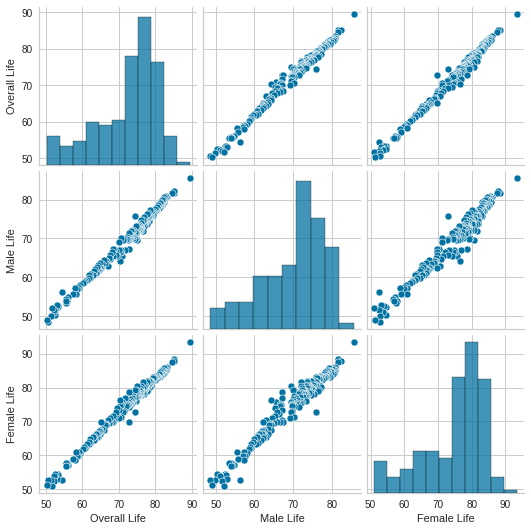

In [20]:
sns.pairplot(df[nums[1:]])

the higher male life expectancy the better the female's. and vice versa when male's life expectancy decreases, female's will also decrease. and obviously overall life expectancy will follow the same trend as it is a combination of male and female life exepctancy

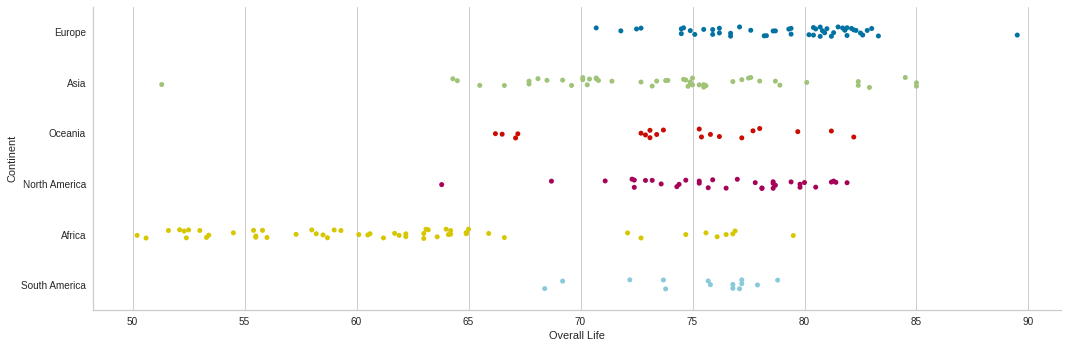

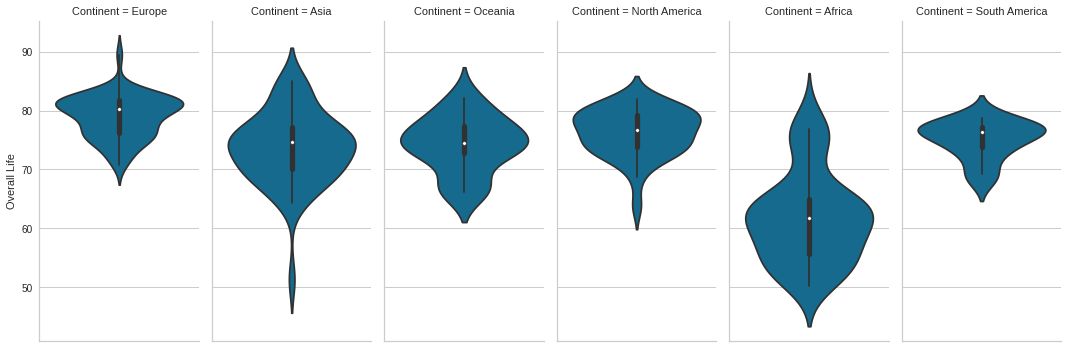

In [28]:
sns.catplot(data = df, x = 'Overall Life', y = 'Continent', height = 5, aspect = 3)
sns.catplot(data = df,y = 'Overall Life', col = 'Continent', height = 5, aspect = .5,kind = 'violin')

countries from continents other than africa seems to be clustered in one place where the life expectancy is at 65 to 90 and leave african countries at the bottom alone where life expectancy is below 65. only fiew of african countries managed to be in the majority cluster. 

# Model Building

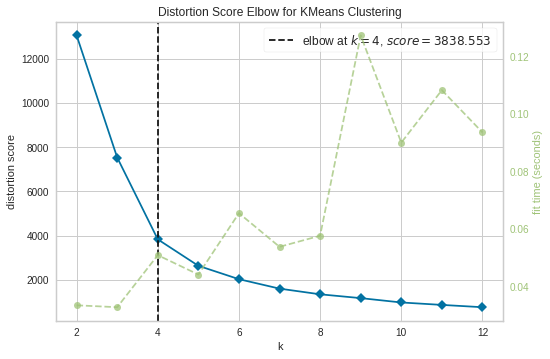

In [30]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model,k = 12)
visualizer.fit(df[nums[1:]])
visualizer.show()

we found the elbow at k = 5 will be optimal. to validate this, let's use sihouette score to see if it's giving the same conclusion

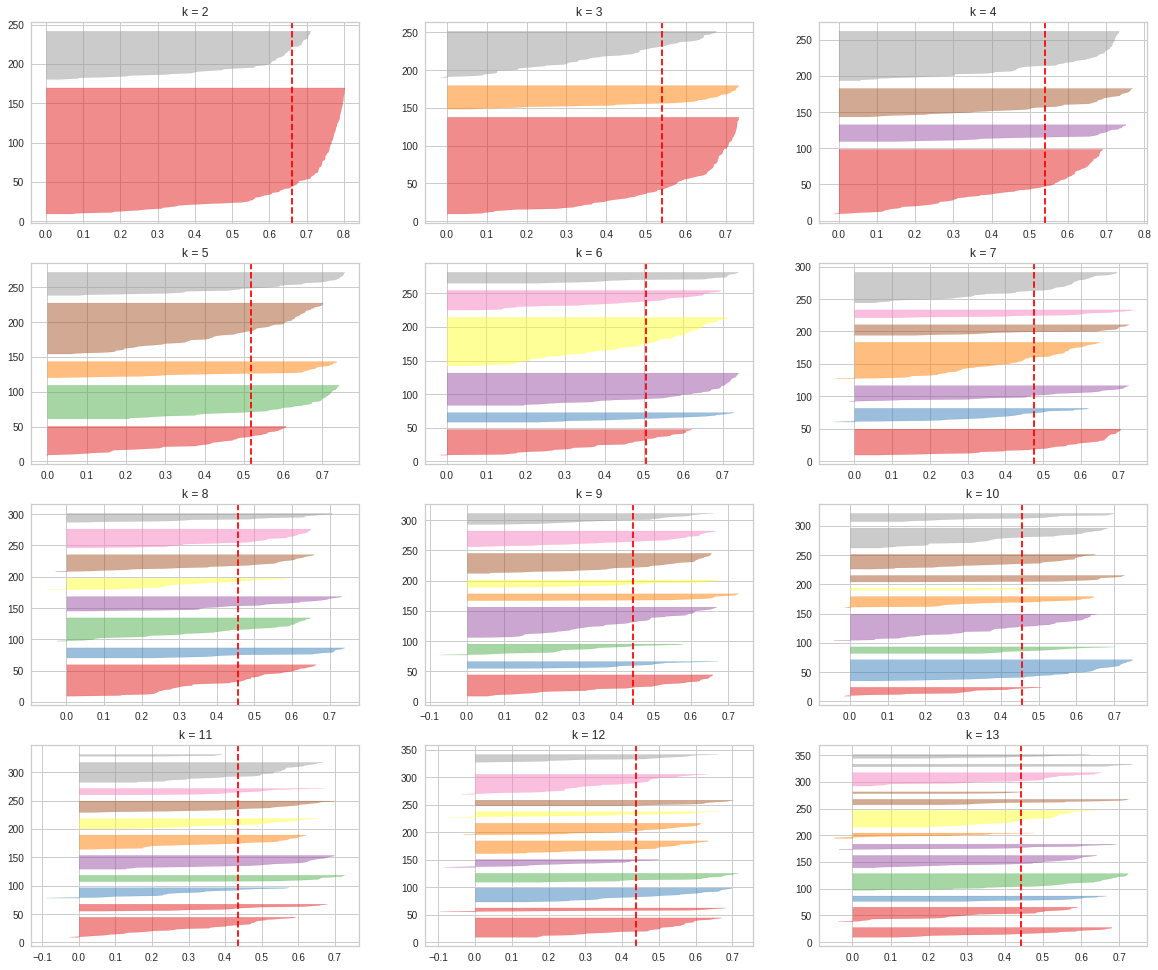

In [47]:
fig,ax = plt.subplots(4,3,figsize = (20,17))
row = 0
col = 0
for clust in range(2,14):
  model = KMeans(n_clusters = clust,random_state=42)
  visualizer = SilhouetteVisualizer(model, ax = ax[row,col])
  ax[row,col].set_title(f'k = {clust}')
  visualizer.fit(df[nums[1:]])
  # visualizer.show()
  if col != 2:
    col += 1
  else:
    col = 0
    row += 1

when k = 4, cluster 0 and 3 are wat bigger in size compared to cluster 1 and 2. but when k = 5, size difference between clusters is not that big. therfore i am going to use k = 5.

# Dimentionality Reduction

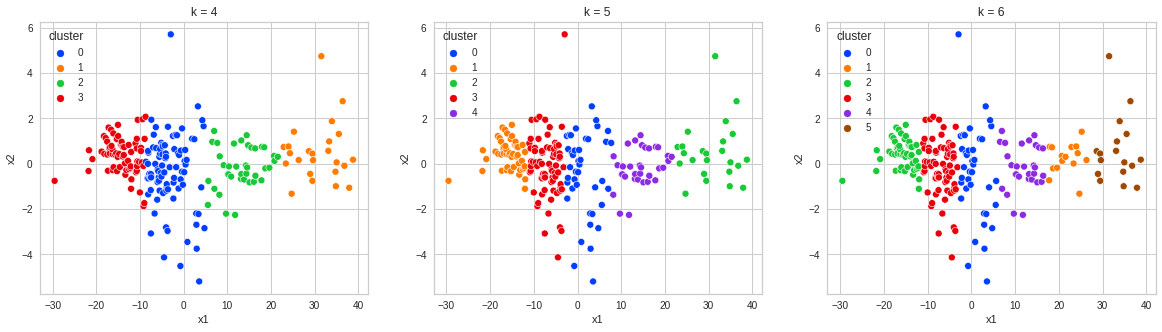

In [43]:
 fig,ax = plt.subplots(1,3,figsize = (20,5))
 col = 0
 for clust in [4,5,6]:
  model = KMeans(n_clusters = clust, random_state=42)
  model.fit(df[nums[1:]])
  clusters = model.predict(df[nums[1:]])
  pca = PCA(n_components=2,random_state=42)
  pca_df=pd.DataFrame(pca.fit_transform(df[nums[1:]]),columns = ['x1','x2'])
  pca_df['cluster'] = clusters
  sns.scatterplot(data = pca_df, x = 'x1',y = 'x2',hue = 'cluster',ax = ax[col],palette = 'bright')
  ax[col].set_title(f'k = {clust}')
  col += 1

# Model Finalization

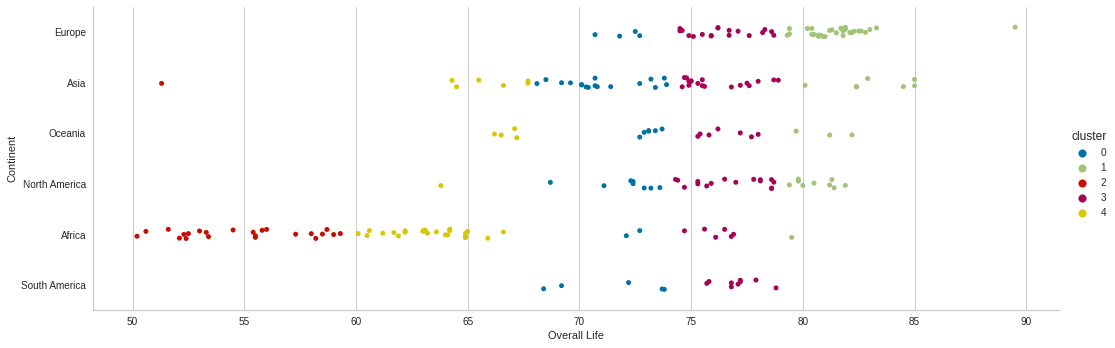

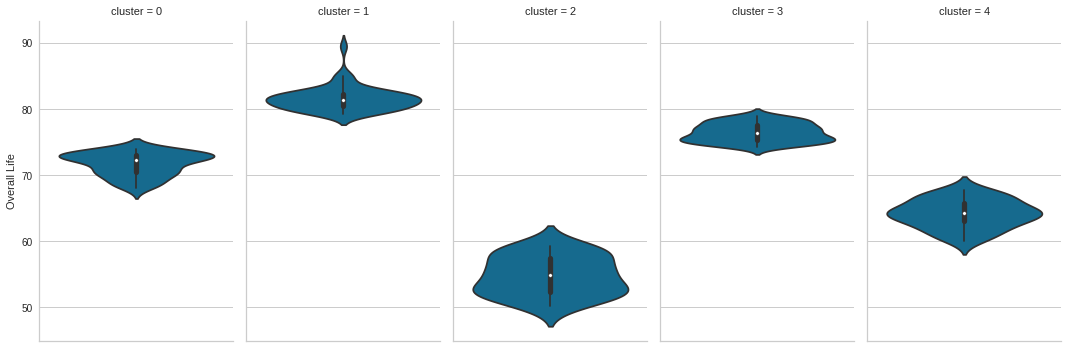

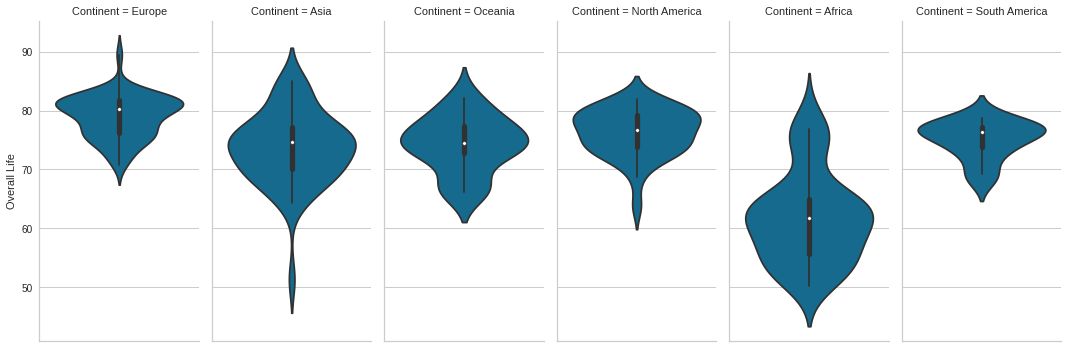

In [55]:
model = KMeans(n_clusters = 5, random_state=42)
model.fit(df[nums[1:]])
clusters = model.predict(df[nums[1:]])
df['cluster'] = clusters
sns.catplot(data = df, x = 'Overall Life', y = 'Continent',hue = 'cluster', height = 5, aspect = 3)
sns.catplot(data = df,y = 'Overall Life', col = 'cluster', height = 5, aspect = .6,kind = 'violin')
sns.catplot(data = df,y = 'Overall Life', col = 'Continent', height = 5, aspect = .5,kind = 'violin')

# Results

### Upper Life Expectancy 
this is cluster 1 where the life expectancy is between 80-90

below is the country respective to upper cluster

In [72]:
print('Countries')
print('_'*100)
print(df[df.cluster == 1].Country.unique())
print('\nContinet')
print('_'*100)
print(df[df.cluster == 1].Continent.unique())

Countries
____________________________________________________________________________________________________
['Monaco' 'Japan' 'Singapore' 'Macau; China' 'San Marino' 'Iceland'
 'Hong Kong, China' 'Andorra' 'Switzerland' 'Guernsey' 'Israel'
 'South Korea' 'Luxembourg' 'Australia' 'Italy' 'Sweden' 'Canada' 'Jersey'
 'Liechtenstein' 'France, metropolitan' 'Norway' 'Spain' 'Austria'
 'Anguilla' 'Bermuda' 'Netherlands' 'Cayman Islands' 'Isle of Man'
 'New Zealand' 'Belgium' 'Finland' 'Ireland' 'Germany' 'United Kingdom'
 'Greece' 'Saint Pierre and Miquelon' 'Faroe Islands' 'Malta'
 'European Union' 'Taiwan' 'U.S. Virgin Islands'
 'Turks and Caicos Islands' 'United States' 'Wallis and Futuna'
 'Saint Helena, Ascension and Tristan da Cunha' 'Denmark' 'Gibraltar'
 'Puerto Rico' 'Portugal']

Continet
____________________________________________________________________________________________________
['Europe' 'Asia' 'Oceania' 'North America' 'Africa']


### Upper Medium Life Expectancy 
this is cluster 3 where the life expectancy is between 75-79

below is the country respective to upper medium cluster

In [71]:
print('Countries')
print('_'*100)
print(df[df.cluster == 3].Country.unique())
print('\nContinet')
print('_'*100)
print(df[df.cluster == 3].Continent.unique())

Countries
____________________________________________________________________________________________________
['Bahrain' 'Chile' 'Cuba' 'Cyprus' 'Qatar' 'British Virgin Islands'
 'Costa Rica' 'Czech Republic' 'Panama' 'Albania' 'Slovenia'
 'Dominican Republic' 'Sint Maarten' 'Kuwait'
 'Northern Mariana Islands; US' 'Falkland Islands' 'Saint Lucia'
 'New Caledonia' 'Lebanon' 'Poland' 'United Arab Emirates' 'Brunei'
 'French Polynesia' 'Paraguay' 'Uruguay' 'Argentina' 'Slovakia' 'Dominica'
 'Morocco' 'Algeria' 'Aruba' 'Ecuador' 'Sri Lanka'
 'Bosnia and Herzegovina' 'Estonia' 'Antigua and Barbuda' 'Libya'
 'Georgia' 'Republic of Macedonia' 'Tonga' 'Tunisia' 'Croatia' 'Hungary'
 'Mexico' 'Cook Islands' 'Venezuela' 'Colombia' 'Saint Kitts and Nevis'
 'Maldives' 'Mauritius' 'Oman' "People's Republic of China" 'Serbia'
 'American Samoa' 'Barbados' 'Saint Vincent and the Grenadines'
 'Saudi Arabia' 'Solomon Islands' 'Romania' 'Malaysia' 'West Bank' 'Iraq'
 'Lithuania' 'Syria' 'Turkey' 'El Sal

### Medium Life Expectancy 
this is cluster 0 where the life expectancy is between 68-74

below is the country respective to medium cluster

In [70]:
print('Countries')
print('_'*100)
print(df[df.cluster == 0].Country.unique())
print('\nContinet')
print('_'*100)
print(df[df.cluster == 0].Continent.unique())

Countries
____________________________________________________________________________________________________
['Gaza Strip' 'Brazil' 'Uzbekistan' 'Peru' 'Samoa' 'Jamaica' 'Vanuatu'
 'Vietnam' 'Bangladesh' 'Nicaragua' 'Marshall Islands' 'Palau'
 'Federated States of Micronesia' 'Trinidad and Tobago' 'Belarus' 'Egypt'
 'Fiji' 'Indonesia' 'Azerbaijan' 'Greenland; Denmark' 'The Bahamas'
 'Guatemala' 'Suriname' 'Cabo Verde' 'Ukraine' 'Iran' 'Honduras'
 'Kazakhstan' 'Kyrgyzstan' 'Moldova' 'Nepal' 'North Korea' 'Russia'
 'Bhutan' 'Turkmenistan' 'Mongolia' 'Bolivia' 'Philippines' 'Belize'
 'India' 'Guyana' 'Timor-Leste']

Continet
____________________________________________________________________________________________________
['Asia' 'South America' 'Oceania' 'North America' 'Europe' 'Africa']


### lower Medium Life Expectancy 
this is cluster 4 where the life expectancy is between 60-67

below is the country respective to lower medium cluster

In [68]:
print('Countries')
print('_'*100)
print(df[df.cluster == 4].Country.unique())
print('\nContinet')
print('_'*100)
print(df[df.cluster == 4].Continent.unique())

Countries
____________________________________________________________________________________________________
['Pakistan' 'Tajikistan' 'Papua New Guinea' 'Nauru' 'Burma' 'Ghana'
 'Tuvalu' 'Kiribati' 'Madagascar' 'Yemen' 'Togo' 'Eritrea'
 'São Tomé and Príncipe' 'The Gambia' 'Cambodia' 'Laos' 'Comoros'
 'Equatorial Guinea' 'Sudan' 'Kenya' 'Haiti' 'Namibia' 'Djibouti'
 'South Africa' 'Western Sahara' 'Mauritania' 'Ethiopia' 'Tanzania'
 'Benin' 'Senegal' 'Malawi' 'Guinea' 'Burundi' 'Rwanda']

Continet
____________________________________________________________________________________________________
['Asia' 'Oceania' 'Africa' 'North America']


### lower Life Expectancy 
this is cluster 2 where the life expectancy is between 50-59

below is the country respective to lower cluster

In [69]:
print('Countries')
print('_'*100)
print(df[df.cluster == 2].Country.unique())
print('\nContinet')
print('_'*100)
print(df[df.cluster == 2].Continent.unique())

Countries
____________________________________________________________________________________________________
['Republic of the Congo' 'Liberia' "Côte d'Ivoire" 'Cameroon'
 'Sierra Leone' 'Zimbabwe' 'Democratic Republic of the Congo' 'Angola'
 'Mali' 'Burkina Faso' 'Niger' 'Uganda' 'Botswana' 'Nigeria' 'Mozambique'
 'Lesotho' 'Zambia' 'Somalia' 'Central African Republic' 'Gabon'
 'Swaziland' 'Afghanistan' 'Guinea-Bissau' 'Chad']

Continet
____________________________________________________________________________________________________
['Africa' 'Asia']
